# Pitch Analysis

Please submit a coherent, readable notebookthat walks Dhrumil and Aishi through the exploratory data analysis and regression analysis you've done in pursuit of your story.

This notebook should be clean and focused:

- move any code for data acquisition or scraping into it's own notebook with a name like `scraping.ipynb`
- move any code for data cleaning and maniupualtion into it's own notebook with a name like `cleaning.ipynb`
- you may even want to make a notebook called `scratchpad.ipynb` to keep your messy analysis, you can carefully move the relevant parts to `analysis.ipynb` and make sure it's written in such a way that Dhrumil and Aishi can follow your logic
    - add text to guide a reader through this notebook, you may want to use [markdown formatting](https://www.markdownguide.org/cheat-sheet/) to help organize your thoguhts.
- make sure `analysis.ipynb` runs (restart and run all cells) from top to bottom without errors


## Setup

This section contains our standard notebook setup, including Python and R Imports. You can zoom right past this! 


In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

R imports

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Python imports

In [4]:
# # installs any python packages in requirements.txt
# !pip install -r requirements.txt

In [5]:
# Python imports for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

import statsmodels.formula.api as smf
from plotnine import *

In [6]:
# ! pip install statsmodels

# ! pip install plotnine

## Loading The Data

_Load the cleaned data here. You're welcome to load multiple dataframes if that makes sense._
- _What is each row? Make sure to explain if it's not obvious._
- _Make sure to mention any caveats of the data we need to be aware of._
- _Make mention of any methodological choices you made in `cleaning.ipynb` that you think are relevant._
- _Display a small chunk of the data with something like `df.head()` or df.sample(5)`, so that we have an idea of what we're working with._


In [7]:
# your code to load and display the data

In [8]:
df = pd.read_csv('final_data.csv')

# fill 0 counts
df['count'] = df['count'].fillna(0).astype(int)

# make t/f column
df['has_open_streets'] = (df['count'] > 0).astype(int)

# median household income in 10s of thousands
df['median_household_income'] = df['median_household_income']/10000

# remove places without median household income 
# TODO - what plaecs did I delete????
df = df.query("median_household_income.notna()")

df

,geoid,count,name,median_household_income,"B19013001, Error",COUNTY,CTLabel,TRACT,_merge,has_open_streets
1,36081016900,11,"Census Tract 169, Queens, NY",7.7027,15493.0,81.0,169.00,16900.0,both,1
2,36061007300,10,"Census Tract 73, New York, NY",14.2409,42874.0,61.0,73.00,7300.0,both,1
3,36081101002,9,"Census Tract 1010.02, Queens, NY",3.8395,32774.0,81.0,1010.02,101002.0,both,1
4,36081029100,8,"Census Tract 291, Queens, NY",5.8226,5107.0,81.0,291.00,29100.0,both,1
5,36047055500,7,"Census Tract 555, Kings, NY",17.4028,15786.0,47.0,555.00,55500.0,both,1
...,...,...,...,...,...,...,...,...,...,...
2199,36085029106,0,"Census Tract 291.06, Richmond, NY",12.7671,25994.0,85.0,291.06,29106.0,right_only,0
2200,36085030301,0,"Census Tract 303.01, Richmond, NY",9.5913,6123.0,85.0,303.01,30301.0,right_only,0
2201,36085030302,0,"Census Tract 303.02, Richmond, NY",8.5842,18154.0,85.0,303.02,30302.0,right_only,0
2202,36085031902,0,"Census Tract 319.02, Richmond, NY",7.6066,35257.0,85.0,319.02,31902.0,right_only,0


# Logistic Regression

In [9]:
%%R -i df

# logistic regression in R
logistic <- glm(has_open_streets~median_household_income + factor(COUNTY), family='binomial', data=df)
summary(logistic)


Call:
glm(formula = has_open_streets ~ median_household_income + factor(COUNTY), 
    family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3731  -0.4568  -0.3382  -0.2874   2.7128  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -3.46944    0.26623 -13.032  < 2e-16 ***
median_household_income  0.10004    0.01677   5.966 2.43e-09 ***
factor(COUNTY)47         0.58459    0.27950   2.092   0.0365 *  
factor(COUNTY)61         1.41754    0.30294   4.679 2.88e-06 ***
factor(COUNTY)81        -0.39970    0.31431  -1.272   0.2035    
factor(COUNTY)85        -0.59599    0.52622  -1.133   0.2574    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1451.3  on 2195  degrees of freedom
Residual deviance: 1288.2  on 2190  degrees of freedom
AIC: 1300.2

Number of Fisher Scoring iterations: 5



In [10]:
%%R 

require('DescTools')
PseudoR2(logistic)


R[write to console]: Loading required package: DescTools



McFadden 
0.112385 


In [11]:
%%R

exp(coef(logistic))

            (Intercept) median_household_income        factor(COUNTY)47 
             0.03113437              1.10521600              1.79425698 
       factor(COUNTY)61        factor(COUNTY)81        factor(COUNTY)85 
             4.12694110              0.67052445              0.55101441 


In [12]:
%%R -o df

df <- df %>% mutate(
    prediction_logodds = predict(logistic),
    prediction_odds = exp(predict(logistic)),
    prediction_pct = prediction_odds / (1 + prediction_odds)
)

In [13]:
df.sort_values(by='prediction_pct')

,geoid,count,name,median_household_income,"B19013001, Error",COUNTY,CTLabel,TRACT,_merge,has_open_streets,prediction_logodds,prediction_odds,prediction_pct
2106,36085004003,0,"Census Tract 40.03, Richmond, NY",1.3855,13124.0,85.0,40.03,4003.0,right_only,0,-3.926831,0.019706,0.019325
2137,36085013301,0,"Census Tract 133.01, Richmond, NY",1.6250,11363.0,85.0,133.01,13301.0,right_only,0,-3.902871,0.020184,0.019785
2174,36085020702,0,"Census Tract 207.02, Richmond, NY",2.8523,25827.0,85.0,207.02,20702.0,right_only,0,-3.780091,0.022821,0.022311
2101,36085002700,0,"Census Tract 27, Richmond, NY",3.0188,14585.0,85.0,27.00,2700.0,right_only,0,-3.763434,0.023204,0.022678
1511,36081008700,0,"Census Tract 87, Queens, NY",1.7981,12283.0,81.0,87.00,8700.0,right_only,0,-3.689255,0.024991,0.024381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,36061003300,1,"Census Tract 33, New York, NY",25.0001,NaN,61.0,33.00,3300.0,both,1,0.449123,1.566938,0.610431
112,36061015002,2,"Census Tract 150.02, New York, NY",25.0001,NaN,61.0,150.02,15002.0,both,1,0.449123,1.566938,0.610431
1288,36061009901,0,"Census Tract 99.01, New York, NY",25.0001,NaN,61.0,99.01,9901.0,right_only,0,0.449123,1.566938,0.610431
1306,36061011401,0,"Census Tract 114.01, New York, NY",25.0001,NaN,61.0,114.01,11401.0,right_only,0,0.449123,1.566938,0.610431


In [14]:
df.sort_values(by='prediction_pct').to_csv('prediction.csv')

## Exploratory Analysis

_In the cells below, guide us through your exploratory data analysis. You may include charts and regressions as you see fit._


_You may want to use [markdown formatting](https://www.markdownguide.org/cheat-sheet/) to help organize your thoguhts. You can make a separate `scratchpad.ipynb` to store analysis that you were trying out but isn't ultimately relevant to your pitch. You don't need to rewrite your pitch here, but please make sure to include enough text for Dhrumil and Aishi to be able to follow your logic._

In [15]:
%%R -i df 

# runn a  regression

model = lm(`count` ~ `median_household_income`, data = df)

summary(model)


Call:
lm(formula = count ~ median_household_income, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1104 -0.2906 -0.1784 -0.0535 10.7733 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.166776   0.042284  -3.944 8.26e-05 ***
median_household_income  0.051086   0.004821  10.597  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8734 on 2194 degrees of freedom
Multiple R-squared:  0.04869,	Adjusted R-squared:  0.04826 
F-statistic: 112.3 on 1 and 2194 DF,  p-value: < 2.2e-16



In [16]:
df['count'].unique()

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0], dtype=int32)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


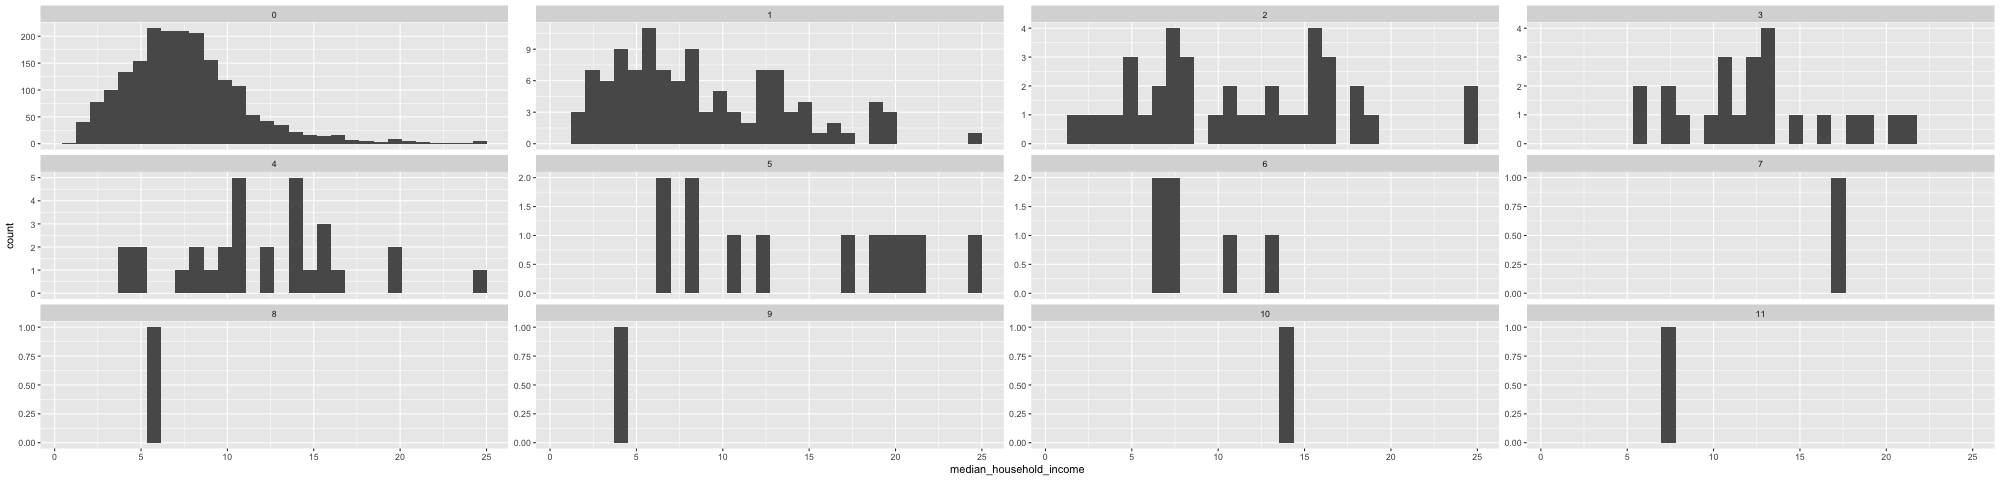

In [17]:
%%R -i df -w 2000
ggplot(df, aes(x = `median_household_income`)) + geom_histogram() + facet_wrap(~count, scales='free_y')

In [18]:
df.pivot_table(index='count', values='median_household_income', aggfunc=['mean', 'median'])

,mean,median
,median_household_income,median_household_income
count,,
0,7.592247,7.20610
1,8.803052,7.76330
2,11.190853,10.76170
3,12.390335,12.11250
4,12.006710,11.48730
5,14.700467,14.84720
6,8.657000,7.39955
7,17.402800,17.40280


In [19]:
%%R

no_open_streets <- df %>% filter(count==0)
has_open_streets <- df %>% filter(count>=1)

t.test(no_open_streets$median_household_income, has_open_streets$median_household_income)


	Welch Two Sample t-test

data:  no_open_streets$median_household_income and has_open_streets$median_household_income
t = -7.4357, df = 246.56, p-value = 1.715e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.466752 -2.014765
sample estimates:
mean of x mean of y 
 7.592247 10.333006 



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


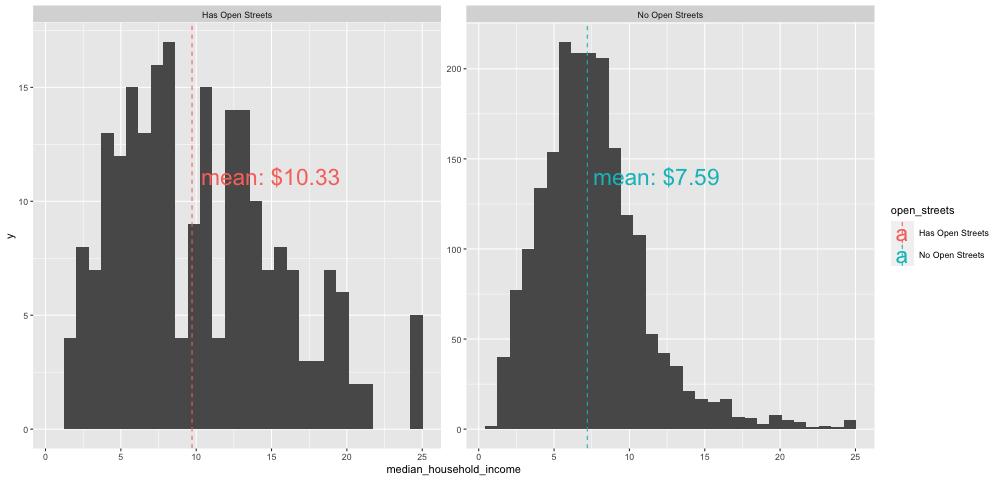

In [20]:
%%R -w 1000

df <- df %>% mutate(open_streets = ifelse(count==0, 'No Open Streets', 'Has Open Streets'))
annotations <- df %>% group_by(open_streets) %>% summarise(
    median = median(`median_household_income`),
    mean = mean(`median_household_income`)
    )

ggplot(df) + 
    aes(x = `median_household_income`) +
    geom_histogram() + 
    facet_wrap(~open_streets, scales='free_y') +
    # plot median vertical line on each facet
    geom_vline(data = annotations, aes(xintercept = median, color = open_streets), linetype = "dashed") +
    # plot annotaitons as text on vertical line 
    geom_text(data = annotations, aes(x = mean, y = 0, color = open_streets, label = paste0("mean: $", round(mean,2))), vjust = -15, hjust = 0, size = 8)
    

In [21]:
%%R

t.test(median_household_income ~ open_streets, data=df)


	Welch Two Sample t-test

data:  median_household_income by open_streets
t = 7.4357, df = 246.56, p-value = 1.715e-12
alternative hypothesis: true difference in means between group Has Open Streets and group No Open Streets is not equal to 0
95 percent confidence interval:
 2.014765 3.466752
sample estimates:
mean in group Has Open Streets  mean in group No Open Streets 
                     10.333006                       7.592247 



`geom_smooth()` using formula = 'y ~ x'


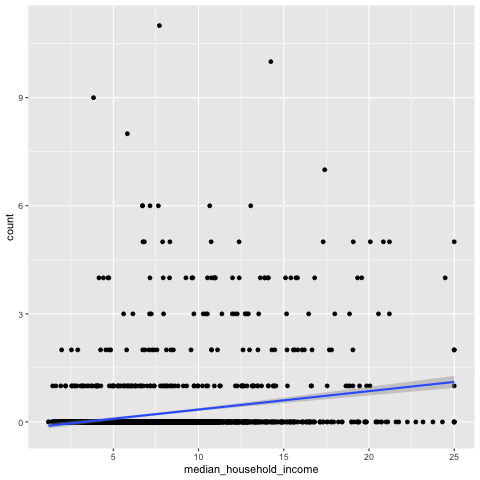

In [22]:
%%R  

# plot the data

# label  the  dots  

# ggplot(df, aes(x = `median_household_income`, y = `count`)) + geom_point() + geom_smooth(method = 'lm') + geom_text(aes(label = `tract`), vjust = -1, hjust = 1, size = 3)

ggplot(df, aes(x = `median_household_income`, y = `count`)) + geom_point() + geom_smooth(method = 'lm')


This is a regression model looking at the number of Open Streets in census tracts in relation to median household income. 

Looking at the adjusted R squared value, which is very close to to 0 - there does not seem to be a correlation between the two variables. 


In [23]:
# save df to csv

df.to_csv('edited_complaints.csv', index = False)